In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('heart.csv')

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values (if any) - In this dataset, there are no missing values,
# but if there were, we could use strategies like imputation or dropping rows/columns.
# For this dataset, no explicit handling is needed as per the check.

# Identify categorical features and perform one-hot encoding
# Based on the dataset description (or common knowledge about this dataset),
# the categorical features are typically: sex, cp, fbs, restecg, exang, slope, ca, thal
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("\nShape of original DataFrame:", df.shape)
print("Shape of encoded DataFrame:", df_encoded.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Shape of original DataFrame: (1025, 14)
Shape of encoded DataFrame: (1025, 23)
Shape of X_train: (768, 22)
Shape of X_test: (257, 22)
Shape of y_train: (768,)
Shape of y_test: (257,)


In [2]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

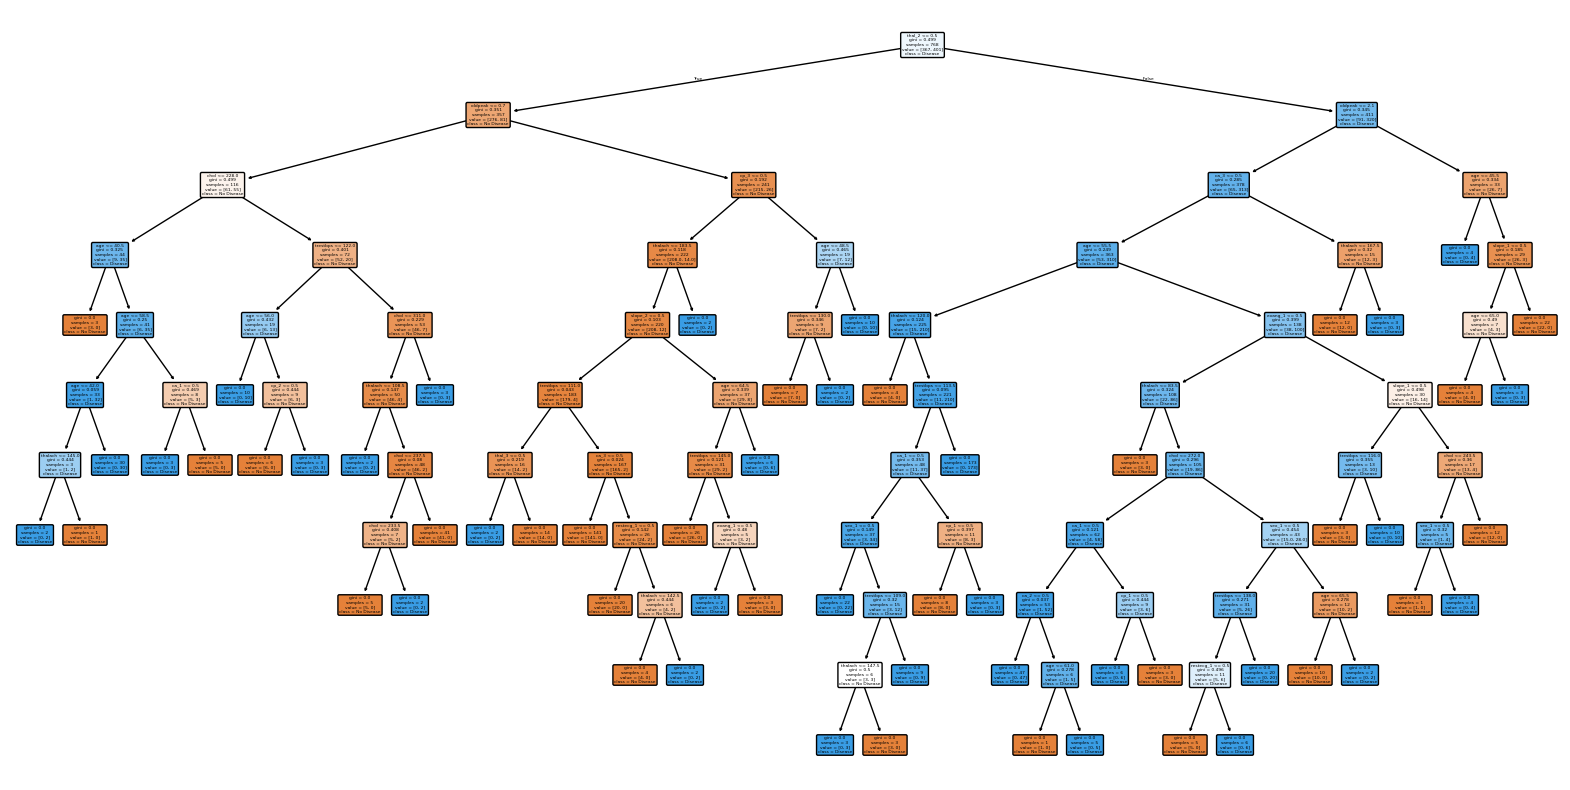

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree

# Adjust the plot size
plt.figure(figsize=(20, 10))

# Visualize the Decision Tree
tree.plot_tree(dt_classifier,
               feature_names=X_train.columns,
               class_names=['No Disease', 'Disease'],
               filled=True,
               rounded=True)

# Display the plot
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training set
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy of the full Decision Tree: {train_accuracy:.4f}")

# Calculate accuracy on the test set
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy of the full Decision Tree: {test_accuracy:.4f}")

# Train a new Decision Tree Classifier with a restricted maximum depth
dt_classifier_restricted = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_restricted.fit(X_train, y_train)

# Calculate accuracy on the training set for the restricted tree
y_train_pred_restricted = dt_classifier_restricted.predict(X_train)
train_accuracy_restricted = accuracy_score(y_train, y_train_pred_restricted)
print(f"Training Accuracy of the restricted Decision Tree (max_depth=3): {train_accuracy_restricted:.4f}")

# Calculate accuracy on the test set for the restricted tree
y_test_pred_restricted = dt_classifier_restricted.predict(X_test)
test_accuracy_restricted = accuracy_score(y_test, y_test_pred_restricted)
print(f"Test Accuracy of the restricted Decision Tree (max_depth=3): {test_accuracy_restricted:.4f}")

Training Accuracy of the full Decision Tree: 1.0000
Test Accuracy of the full Decision Tree: 0.9650
Training Accuracy of the restricted Decision Tree (max_depth=3): 0.8581
Test Accuracy of the restricted Decision Tree (max_depth=3): 0.7899


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the trained Decision Tree model
dt_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree model on the test set
dt_test_accuracy = accuracy_score(y_test, dt_predictions)

# Predict on the test set using the trained Random Forest model
rf_predictions = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest model on the test set
rf_test_accuracy = accuracy_score(y_test, rf_predictions)

# Print the test accuracies
print(f"Test Accuracy of Decision Tree Classifier: {dt_test_accuracy:.4f}")
print(f"Test Accuracy of Random Forest Classifier: {rf_test_accuracy:.4f}")

Test Accuracy of Decision Tree Classifier: 0.9650
Test Accuracy of Random Forest Classifier: 0.9883


Feature Importances from Random Forest:


,feature,importance
4,oldpeak,0.123080
3,thalach,0.119488
20,thal_2,0.103306
21,thal_3,0.092112
2,chol,0.088445
0,age,0.085427
1,trestbps,0.073554
12,exang_1,0.044756
14,slope_2,0.038695
13,slope_1,0.032640


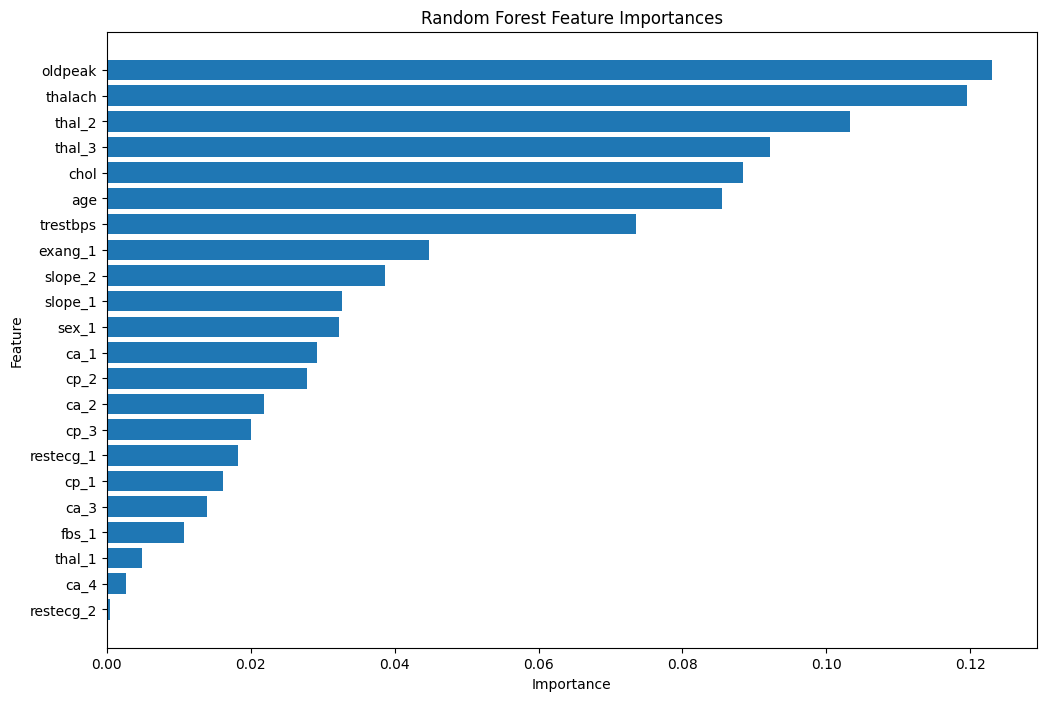

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Access feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a pandas DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances from Random Forest:")
display(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use cross-validation to evaluate the Decision Tree Classifier
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=5)

# Use cross-validation to evaluate the Random Forest Classifier
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores for Decision Tree
print(f"Decision Tree Cross-Validation Accuracy (5-fold):")
print(f"  Mean: {np.mean(dt_cv_scores):.4f}")
print(f"  Standard Deviation: {np.std(dt_cv_scores):.4f}")

# Print the mean and standard deviation of the cross-validation scores for Random Forest
print(f"\nRandom Forest Cross-Validation Accuracy (5-fold):")
print(f"  Mean: {np.mean(rf_cv_scores):.4f}")
print(f"  Standard Deviation: {np.std(rf_cv_scores):.4f}")

Decision Tree Cross-Validation Accuracy (5-fold):
  Mean: 0.9883
  Standard Deviation: 0.0110

Random Forest Cross-Validation Accuracy (5-fold):
  Mean: 0.9883
  Standard Deviation: 0.0110


## Summary:

### Data Analysis Key Findings

*   The initial Decision Tree model achieved perfect training accuracy (1.0000) but a lower test accuracy (0.9650), indicating overfitting.
*   Restricting the Decision Tree's depth to 3 reduced the training accuracy to 0.8581 and resulted in a smaller gap between training and test accuracy (0.7899), suggesting reduced overfitting.
*   The full Decision Tree Classifier achieved a test accuracy of 0.9650.
*   The Random Forest Classifier achieved a higher test accuracy of 0.9883 compared to the full Decision Tree.
*   Feature importance analysis of the Random Forest model identified 'oldpeak', 'thalach', 'thal\_2', and 'thal\_3' as the most influential features for prediction. Features like 'restecg\_2' and 'ca\_4' had very low importance.
*   Using 5-fold cross-validation, both the Decision Tree and Random Forest classifiers showed a mean accuracy of 0.9883 with a standard deviation of 0.0110, indicating similar robust performance estimates.


